In [4]:
train = pd.read_csv("data/train_new.csv").set_index('VisitNumber')
test = pd.read_csv("data/test_new.csv").set_index('VisitNumber')

In [5]:
train.head()

,TripType,Weekday,NumItems,Return,CategoryCounts,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,...,6300.0,2105.0,9550.0,1014.0,3712.0,805.0,3704.0,1352.0,2352.0,2804.0
VisitNumber,,,,,,,,,,,,,,,,,,,,,
5,37,5,-1,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,22,5,2,0.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,18,5,28,1.0,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,5,5,3,0.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,5,5,3,0.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test.head()

,Weekday,NumItems,Return,CategoryCounts,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,...,6.0,105.0,1014.0,1952.0,4654.0,9216.0,2352.0,4408.0,9550.0,2804.0
VisitNumber,,,,,,,,,,,,,,,,,,,,,
1,5,4,0.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,4,0.0,3,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,5,0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,0.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,5,0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train_col = train.drop(['TripType'], axis=1)
dfX = train_col
dfy = train.TripType

##### train_test_split

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.25, random_state=0)

### Logistic Regression

In [9]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

##### train_test_split

In [25]:
Logistic = LogisticRegression().fit(X_train, y_train)

In [26]:
print("Train Score: {:.3f}".format(Logistic.score(X_train, y_train)))
print("Test Score: {:.3f}".format(Logistic.score(X_test, y_test)))

Train Score: 0.699
Test Score: 0.673


##### prediction

In [10]:
Logistic = LogisticRegression().fit(dfX, dfy)

In [11]:
prediction_LR = Logistic.predict(test)

In [12]:
len(prediction_LR)

95674

In [15]:
set(prediction_LR)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37}

--> 8 : TripType_14를 예측하게 못함.

### Random Forest

In [23]:
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import sklearn

In [131]:
forest = RandomForestClassifier(n_estimators=800,
                                criterion='entropy',
                                 max_depth=24,
#                                 min_samples_split=10,
#                                 min_samples_leaf=5,
                                random_state=0)

##### train_test_split

In [132]:
forest = forest.fit(X_train, y_train)

In [133]:
print("Train Score: {:.3f}".format(forest.score(X_train, y_train)))
print("Test Score: {:.3f}".format(forest.score(X_test, y_test)))

Train Score: 0.876
Test Score: 0.666


##### feature importance

In [134]:
importance = forest.feature_importances_

In [135]:
pairs = []
for idx, value in enumerate(importance):
    pairs.append((abs(value), train.columns[idx]))
pairs.sort(key=lambda x: x[0], reverse=True)
for pair in pairs[:20]:
    print("importance: {:4f} feature: {}".format(pair[0], pair[1]))

importance: 0.156731 feature: Weekday
importance: 0.083501 feature: Return
importance: 0.042259 feature: DAIRY
importance: 0.040511 feature: NumItems
importance: 0.037063 feature: GIRLS WEAR, 4-6X  AND 7-14
importance: 0.033724 feature: FABRICS AND CRAFTS
importance: 0.031729 feature: PETS AND SUPPLIES
importance: 0.030509 feature: PRE PACKED DELI
importance: 0.030212 feature: PAINT AND ACCESSORIES
importance: 0.028874 feature: COOK AND DINE
importance: 0.019652 feature: INFANT APPAREL
importance: 0.019389 feature: HORTICULTURE AND ACCESS
importance: 0.017960 feature: MEDIA AND GAMING
importance: 0.016765 feature: SEASONAL
importance: 0.015230 feature: TripType
importance: 0.013547 feature: PHARMACY OTC
importance: 0.012038 feature: FINANCIAL SERVICES
importance: 0.011795 feature: HOUSEHOLD CHEMICALS/SUPP
importance: 0.011260 feature: BATH AND SHOWER
importance: 0.010823 feature: LIQUOR,WINE,BEER


In [136]:
importance.sort()
importance = importance[::-1]
labels = [label[1] for label in pairs]

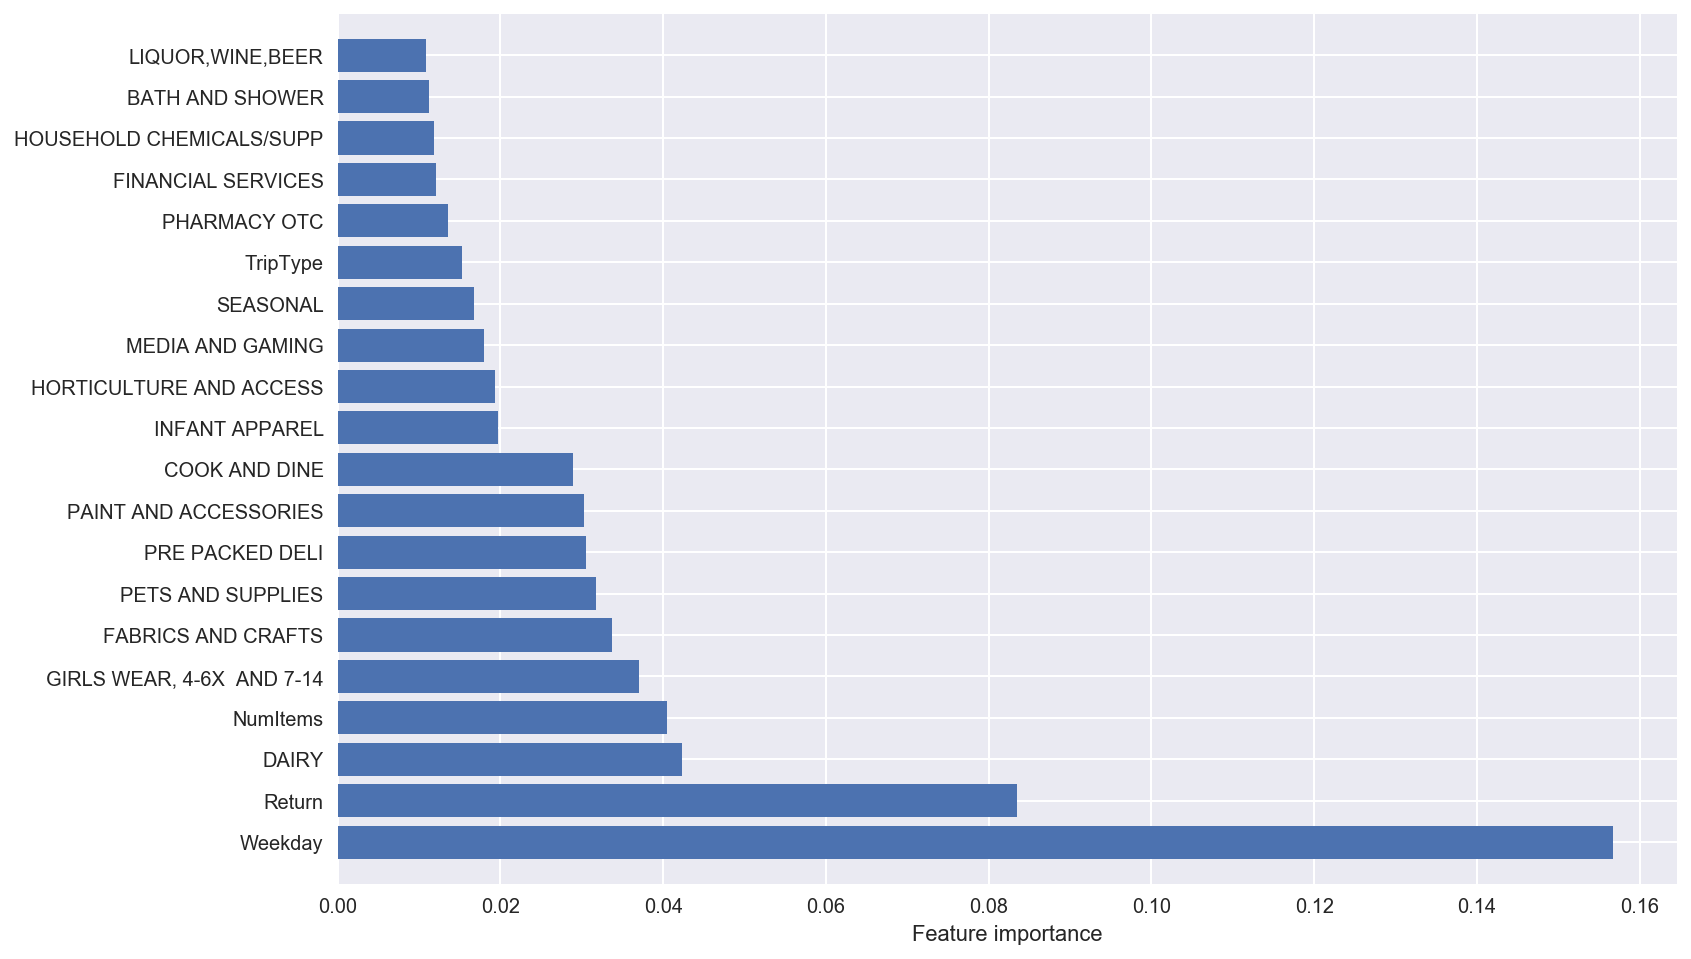

In [137]:
plt.figure(figsize=(12, 8))
plt.barh(range(20), importance[:20], align="center")
plt.yticks(np.arange(20), labels[:20])
plt.xlabel("Feature importance")
plt.ylim(-1, 20)
plt.show()

##### prediction

In [138]:
forest = forest.fit(dfX, dfy)

In [139]:
prediction_RF = Logistic.predict(test)

In [140]:
len(prediction_RF)

95674

In [141]:
len(set(prediction_RF))

37

In [44]:
set(prediction_RF)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37}

In [147]:
def prediction_to_csv(prediction):
    df_VN = pd.DataFrame(columns=["VisitNumber"])
    df_VN["VisitNumber"] = test.index
    df_TT = pd.DataFrame(columns=["TripType"])
    df_TT["TripType"] = prediction
    df_TT = pd.get_dummies(df_TT.TripType).astype(int, cbopy=False)
    df_TT = df_TT.rename(columns = {0:"TripType_3", 1: "TripType_4", 2: "TripType_5", 3: "TripType_6", 
                4: "TripType_7", 5: "TripType_8", 6: "TripType_9", 7: "TripType_12", 8: "TripType_14", 
                9: "TripType_15", 10: "TripType_18", 11: "TripType_19", 12: "TripType_20", 13: "TripType_21",
                14: "TripType_22", 15: "TripType_23", 16: "TripType_24", 17: "TripType_25", 18: "TripType_26", 
                19: "TripType_27", 20: "TripType_28", 21: "TripType_29", 22: "TripType_30", 23: "TripType_31", 
                24: "TripType_32", 25: "TripType_33", 26: "TripType_34", 27: "TripType_35", 28: "TripType_36", 
                29: "TripType_37", 30: "TripType_38", 31: "TripType_39", 32: "TripType_40", 33: "TripType_41", 
                34: "TripType_42", 35: "TripType_43", 36: "TripType_44", 37: "TripType_999"})
    trial = pd.concat([df_VN, df_TT], axis=1).set_index('VisitNumber')
    #trial["TripType_4"] = 0
    trial["TripType_14"] = 0
    return trial.to_csv("data/trial_5.csv")

In [148]:
prediction_to_csv(prediction_RF)

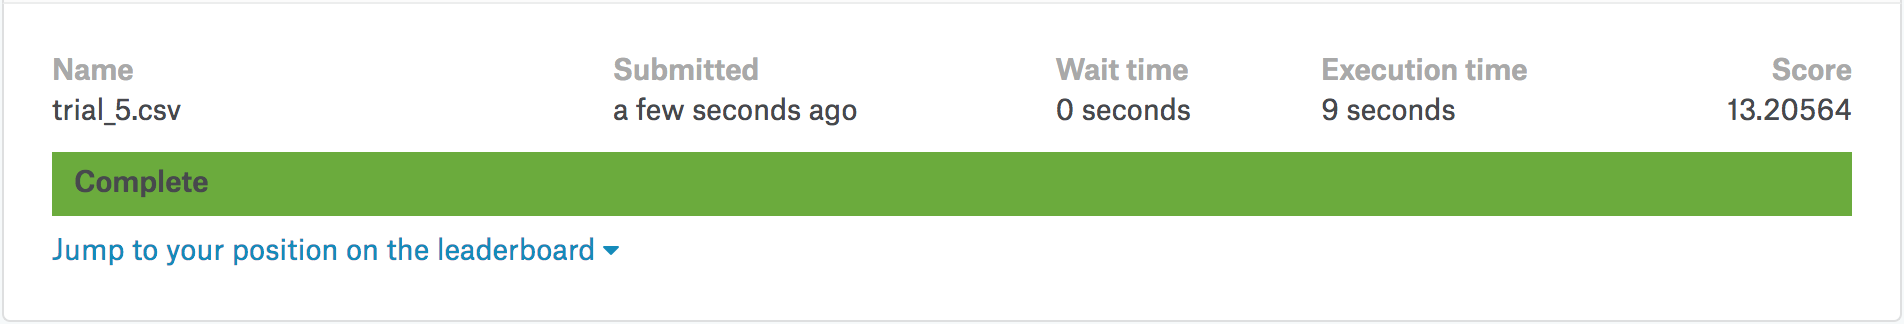

### Extremely Randomized Trees

In [142]:
etc = ExtraTreesClassifier(n_estimators=800,
                                criterion='entropy',
                                max_depth=24,
#                                 min_samples_split=10,
#                                 min_samples_leaf=5,
                                random_state=0)

##### train_test_split

In [143]:
etc = etc.fit(X_train, y_train)

In [144]:
print("Train Score: {:.3f}".format(etc.score(X_train, y_train)))
print("Test Score: {:.3f}".format(etc.score(X_test, y_test)))

Train Score: 0.624
Test Score: 0.499


### Perceptron

In [100]:
from sklearn.linear_model import Perceptron
pct = Perceptron(max_iter=100, eta0=1.0, random_state=1)

##### train_test_split

In [101]:
pct = pct.fit(X_train, y_train)

In [102]:
print("Train Score: {:.3f}".format(pct.score(X_train, y_train)))
print("Test Score: {:.3f}".format(pct.score(X_test, y_test)))

Train Score: 0.623
Test Score: 0.604


### XGBoost

In [129]:
import xgboost
xgb = xgboost.XGBClassifier(n_estimators=50, max_depth=2)

##### train_test_split

In [130]:
xgb.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
print("Train Score: {:.3f}".format(xgb.score(X_train, y_train)))
print("Test Score: {:.3f}".format(xgb.score(X_test, y_test)))